<a href="https://colab.research.google.com/github/schwartz-cnl/Computational-Neuroscience-Class/blob/main/Reinforcement%20Learning/Reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

by Odelia Schwartz, transcribed to python by Xu Pan, 2022.

##Rescora Wagner model
After figure 9.1 in Dayan and Abbott textbook

Pairing stimulus u with reward r

Text(0, 0.5, 'w')

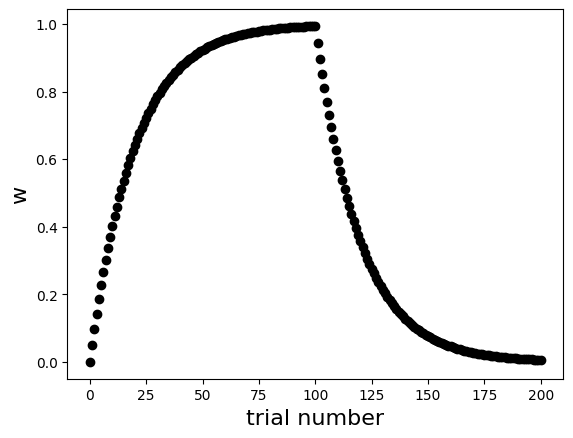

In [1]:
# After figure 9.1 in Dayan and Abbott textbook
# Pairing stimulus u with reward r

import numpy as np
import matplotlib.pyplot as plt

epsilon = .05   # epsilon
w = 0
wVec = [w]
v = w
for i in range(200):
  u = 1
  if i<100:   # stimulus paired with reward
     r = 1
  else:
     r = 0   # stimulus not paired with reward
  w = w + epsilon * (r-v) * u
  v = w
  wVec.append(w)
wVec = np.array(wVec)

plt.plot(wVec, 'ko')
plt.xlabel('trial number', fontsize=16)
plt.ylabel('w', fontsize=16)

Text(0, 0.5, 'w')

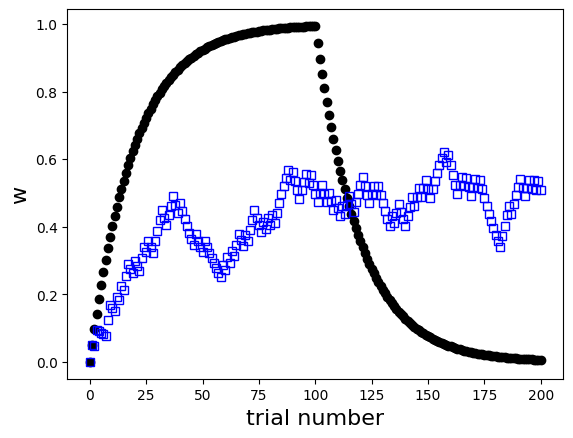

In [2]:
# Write a version of the above that for each
# stimulus has 50 percent chance of being
# paired with a reward. Call the resulting
# weight vector wVec2 and plot it alongside
# wVec above.  

w = 0
wVec2 = [w]
v = w
for i in range(200):
  u = 1
  therand = np.random.rand()
  if therand >= .5:
     r = 1
  else:
     r = 0
  w = w + epsilon * (r-v) * u
  v = w
  wVec2.append(w)

plt.plot(wVec, 'ko')
plt.plot(wVec2, 'sb', markerfacecolor='none')
plt.xlabel('trial number', fontsize=16)
plt.ylabel('w', fontsize=16)

**To Do:**
Try different learning rates (epsilon values)

#Temporal Difference (TD) learning.
After figure 9.2 in Dayan and Abbott.

In [3]:
epsilon = .2      # learning rate
tStim = 100       # time of stimulus
timeSteps = 250   # time steps per trial
numTrials = 1000  # number of trials

u = np.zeros(timeSteps)  # stimulus
r = np.zeros(timeSteps)  # reward
v = np.zeros(timeSteps)  # expected future reward
u[tStim] = 1
r[198] = .5
r[199] = 1
r[201] = .5

# if 0:
#   r[180:219]= np.ones(r[180:219].shape)

delta = np.zeros((timeSteps,numTrials))  # prediction error over trials and time steps
vMat = np.zeros((timeSteps,numTrials))   # expected future reward over trials and time steps
vDiff = np.zeros((timeSteps,numTrials))

for trial in range(numTrials):
  for t in range(1,timeSteps):
     delta[t-1,trial] = r[t-1] + v[t] - v[t-1]       # at time t, update the previous
     if t>=(tStim-1):                                # update when stimulus is present
        v[t-1] = v[t-1] + epsilon*(delta[t-1,trial]) # v expected future reward is updating every trial
     vMat[t-1,trial] = v[t-1]
     vDiff[t-1,trial] = v[t]-v[t-1]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=delta, colorscale='Rainbow')])

fig.update_layout(scene = dict(
                    xaxis_title='trials',
                    yaxis_title='t',
                    zaxis_title='delta'),
                  autosize=False,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

**To Do:** How does delta change over trials? Take slices at
 early trials and late trials, and plot the vectors.
 What are the changes over time signifying in terms of what is learned?
 What happens when you change r -- for instance to have uniform reward values
 between 181:220, or to just have one value at time 150?
 What happens when you change the time of the stimulus?
 How does the expected future reward (v) change over trials?
 You can define a matrix vMat = np.zeros((timeSteps,numTrials))
 and update it every trial, and then look at slices through
 the matrix. What are the changes in v over time signifying in terms of what is learned?

In [5]:
# Your code here:
print(delta.shape)

(250, 1000)
